#Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve, average_precision_score)
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import Data

In [ ]:
!gdown --id 1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af -O Airline_Delay_Causes.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af
To: /content/Airline_Delay_Causes.csv
100% 23.5M/23.5M [00:00<00:00, 142MB/s]


In [ ]:
dfm = pd.read_csv('/content/Airline_Delay_Causes.csv')
df = pd.read_csv('/content/Airline_Delay_Causes.csv')

#Data Cleansing and Data Parsing

In [ ]:
dfm.head()
dfm.shape

(140875, 21)

In [ ]:
dfm.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [ ]:
dfm['year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018])

In [ ]:
dfm['month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
# Create a dictionary to store the carrier name and code mappings
carrier_mapping = {}

# Iterate through the DataFrame to populate the dictionary
for index, row in dfm.iterrows():
    carrier_name = row['carrier_name']
    carrier_code = row['carrier']
    carrier_mapping[carrier_name] = carrier_code  # Map carrier name to code

# Create a DataFrame from the dictionary
unique_carriers_df = pd.DataFrame(list(carrier_mapping.items()), columns=['Carrier Name', 'Carrier Code'])

# Display the DataFrame
print(unique_carriers_df)

                                 Carrier Name Carrier Code
0                                   Envoy Air           MQ
1                             Spirit Airlines           NK
2                           PSA Airlines Inc.           OH
3                       SkyWest Airlines Inc.           OO
4                           Piedmont Airlines           PT
5                                 Horizon Air           QX
6                    United Air Lines Network           UA
7                          Southwest Airlines           WN
8                          Mesa Airlines Inc.           YV
9                            Republic Airline           YX
10                          Endeavor Air Inc.           9E
11                  American Airlines Network           AA
12                    Alaska Airlines Network           AS
13                            JetBlue Airways           B6
14              CommuteAir LLC dba CommuteAir           C5
15                    Delta Air Lines Network           

In [ ]:
dfm_afts = dfm[dfm['carrier'].isin(['WN', 'DL', 'B6', 'UA', 'AA'])]
dfm_afts.shape

(37230, 21)

#Data Exploration and Data Parsing

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Calculate unique_airports_count here
unique_airports_count = df['airport'].unique()  # Assuming you want unique airports, not carriers

# Create a slider widget
slider = widgets.IntSlider(
    value=10,
    min=1,
    max=len(unique_airports_count),
    step=1,
    description='Top N Airports:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Function to update the plot based on the slider value
def update_plot(change):
    n_airports = change.new
    airport_cancelled = df.groupby('airport')['arr_del15'].sum().sort_values(ascending=False).head(n_airports)

    plt.figure(figsize=(10, 6))
    plt.bar(airport_cancelled.index, airport_cancelled.values)
    plt.xlabel('Airport Name')
    plt.ylabel('Total Cancelled Arrivals')
    plt.title(f'Top {n_airports} Airports with Most Cancelled Arrivals')
    plt.xticks(rotation=50, ha='right')
    plt.tight_layout()
    plt.show()


# Observe the slider for changes and call the update_plot function
slider.observe(update_plot, names='value')

# Display the slider
display(slider)

IntSlider(value=10, continuous_update=False, description='Top N Airports:', max=388, min=1)

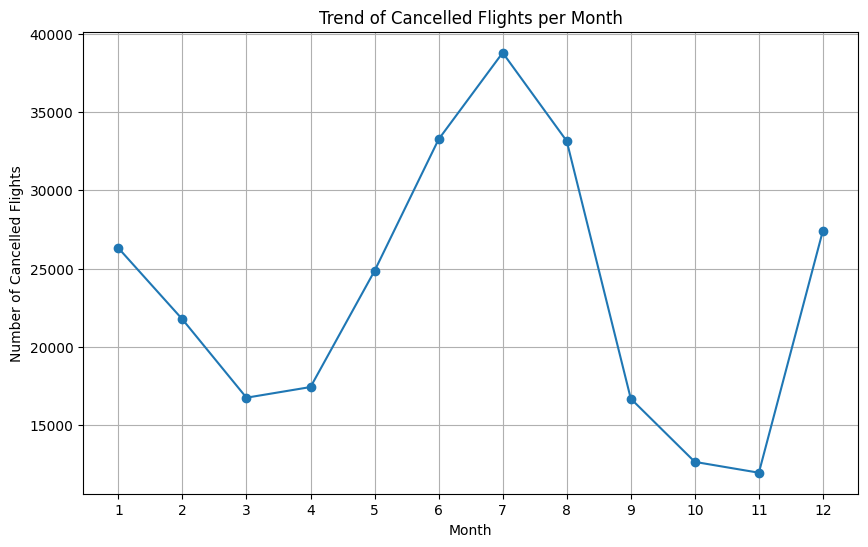

In [ ]:
monthly_cancellations = df.groupby('month')['weather_ct'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)
# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))
plt.show()
plt.show()



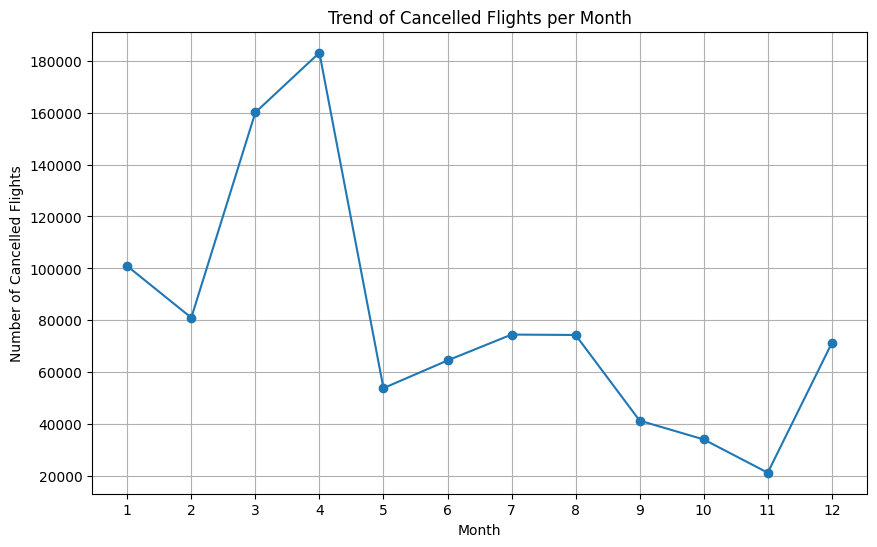

In [ ]:
# prompt: Give me a lineplot code to plot the canceled flights with the month to see the trend

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Month' column exists and 'Cancelled' column represents cancelled flights
# Replace 'Cancelled' with the actual column name if different


monthly_cancellations = df.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

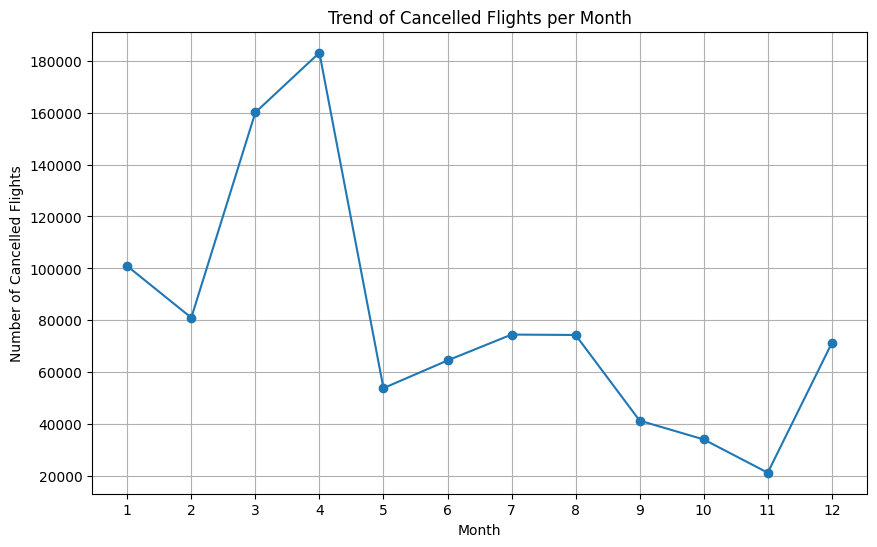

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'month' and sum 'arr_cancelled'
monthly_cancellations = df.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)

# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))

plt.show()

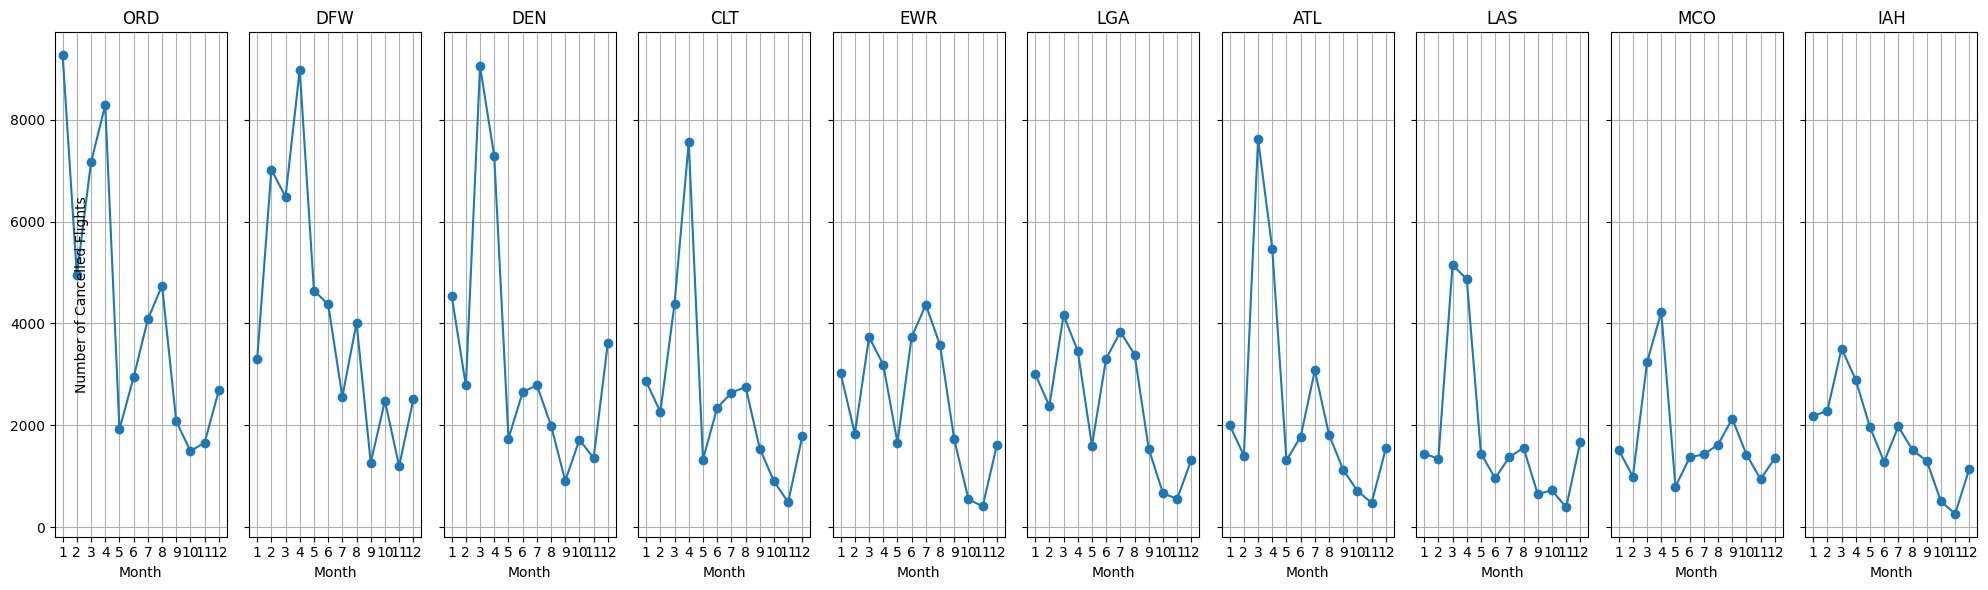

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = df.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(10).index

# Create subplots
fig, axes = plt.subplots(1, 10, figsize=(20, 6), sharey=True)  # 1 row, 10 columns

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = df[df['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Set common y-axis label
fig.text(0.04, 0.5, 'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

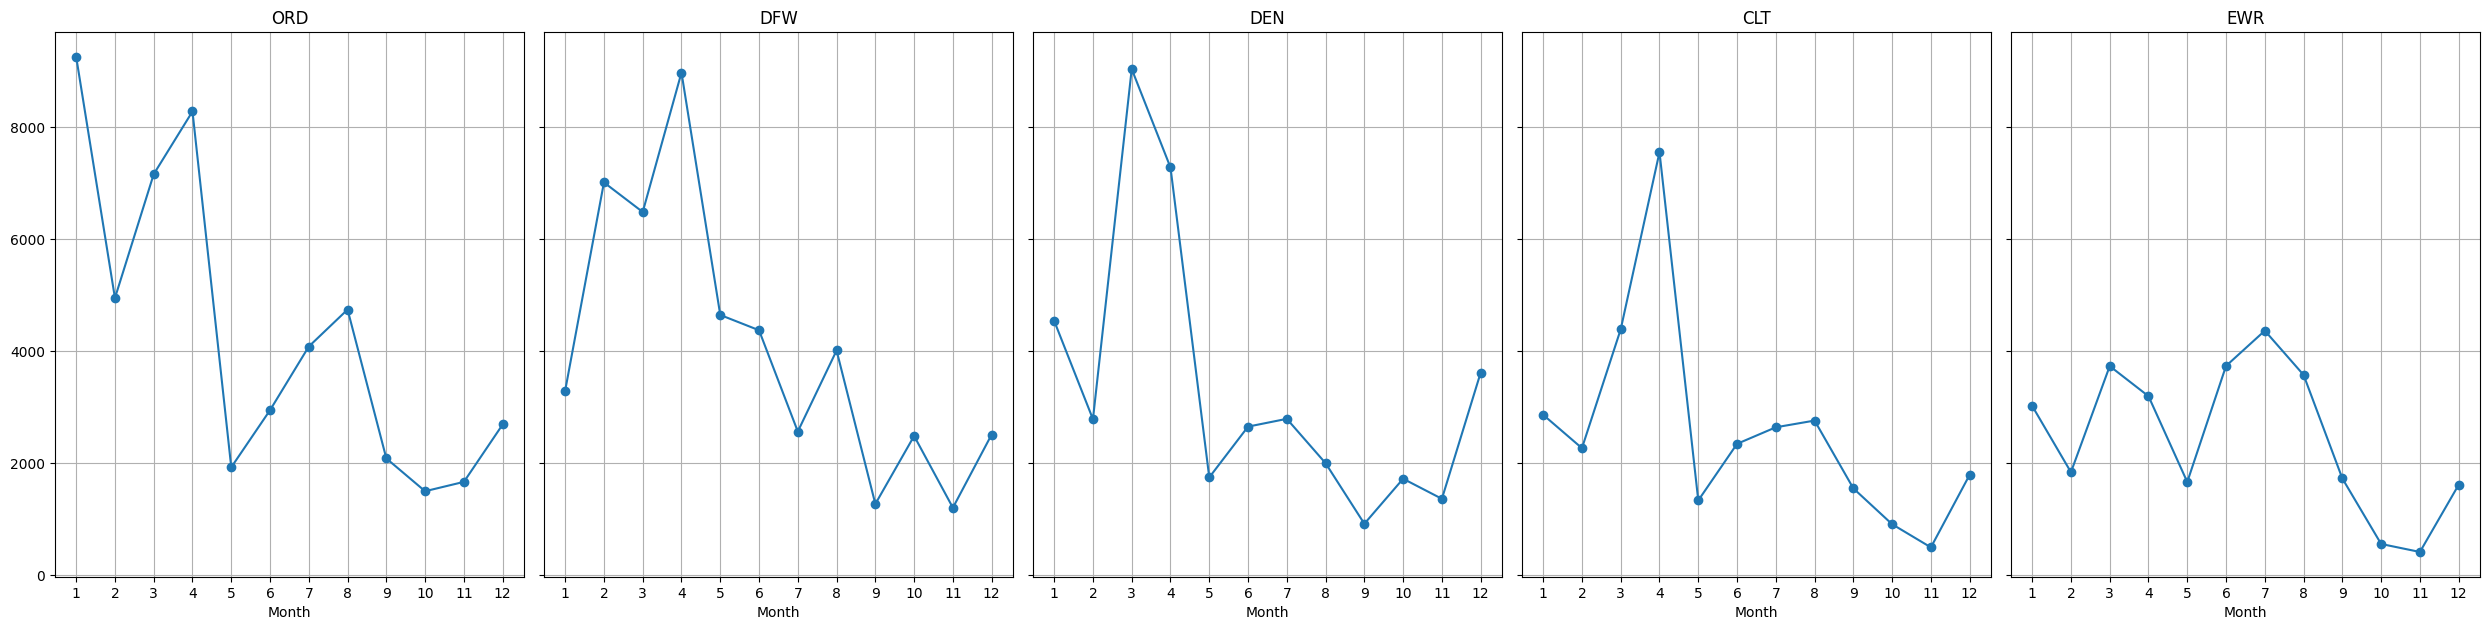

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = df.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(5).index

num_rows = 2  # Number of rows in the subplot grid
num_cols = 5   # Number of columns in the subplot grid
num_plots = len(worst_airports)  # Total number of plots needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 12), sharey=True)

axes = axes.flatten()  # Flatten the axes array

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = df[df['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Set common y-axis label
#fig.text(0,'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

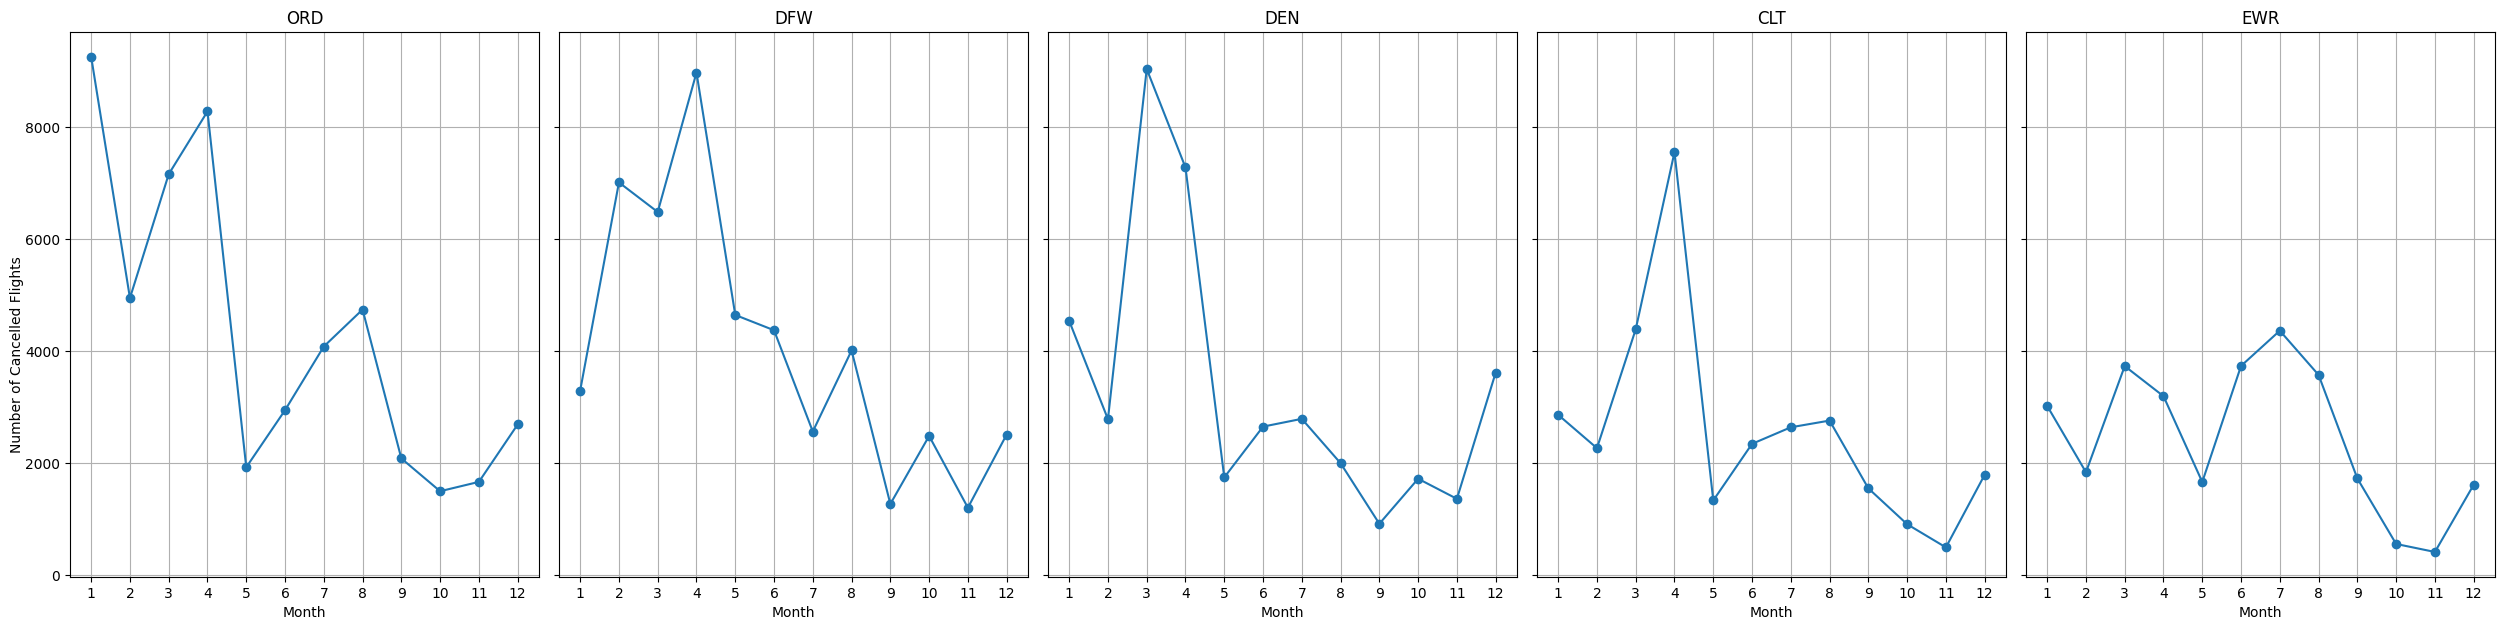

In [ ]:
# Get the top 5 worst airports
worst_airports = df.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(5).index

num_rows = 2  # Number of rows in the subplot grid
num_cols = 5  # Number of columns in the subplot grid
num_plots = len(worst_airports)  # Total number of plots needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 12), sharey=True)

axes = axes.flatten()  # Flatten the axes array

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = df[df['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Set common y-axis label
fig.text(0, 0.7,'Number of Cancelled Flights', va='center', rotation='vertical') # Updated y-axis label placement

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

<ipython-input-55-c4004491d74a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='arr_delay', data=dfm_2024, ci=None) # ci=None removes confidence intervals


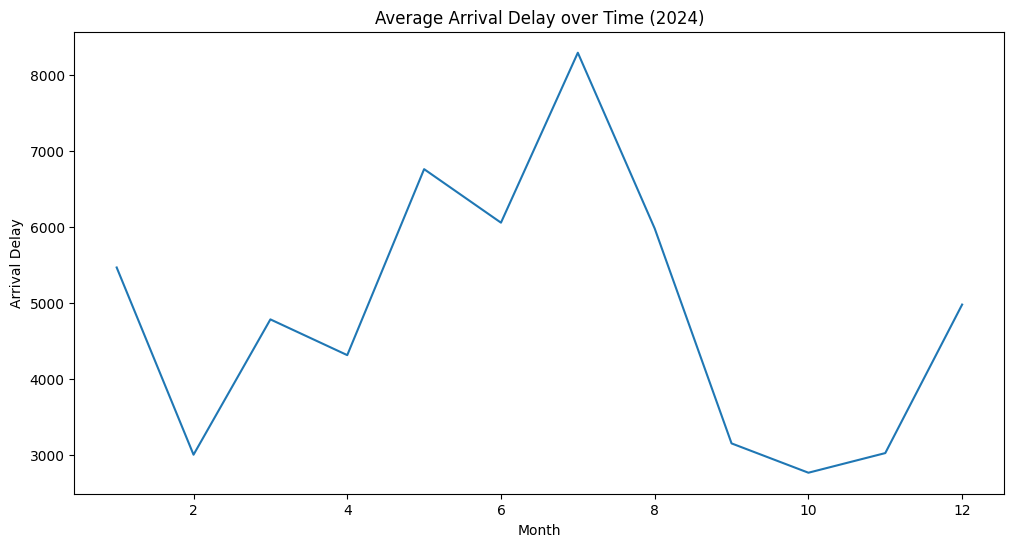

In [ ]:
import matplotlib.pyplot as plt
# Filter data for 2024
dfm_2024 = dfm[dfm['year'] == 2024]

# Smooth line plot of arr_delay over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='arr_delay', data=dfm_2024, ci=None) # ci=None removes confidence intervals
plt.title('Average Arrival Delay over Time (2024)')
plt.xlabel('Month')
plt.ylabel('Arrival Delay')
plt.show()

<ipython-input-56-c10aeaf34712>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay_by_carrier, x='carrier', y='carrier_ct', palette='muted')


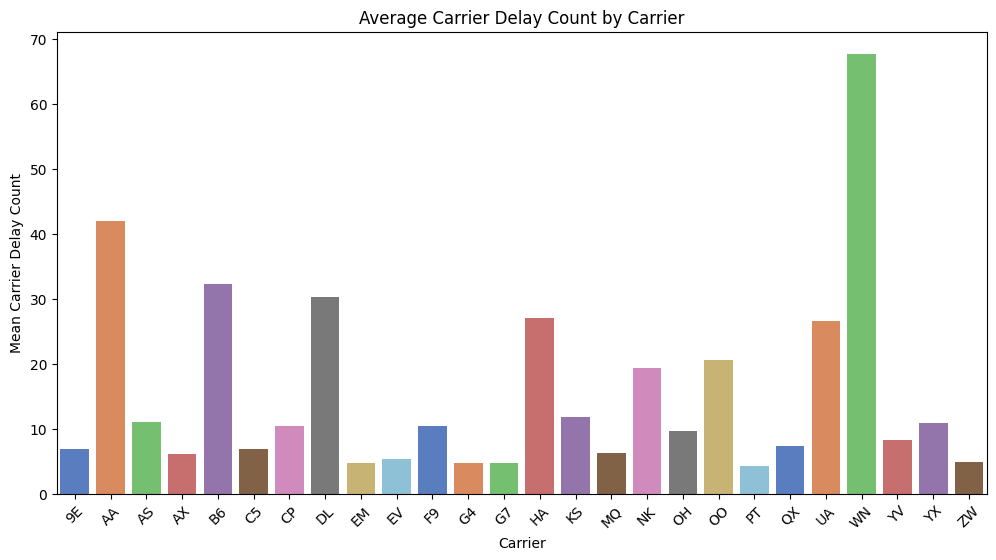

In [ ]:
# Average delay count per carrier
avg_delay_by_carrier = df.groupby('carrier')['carrier_ct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_delay_by_carrier, x='carrier', y='carrier_ct', palette='muted')
plt.title("Average Carrier Delay Count by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Mean Carrier Delay Count")
plt.xticks(rotation=45)
plt.show()

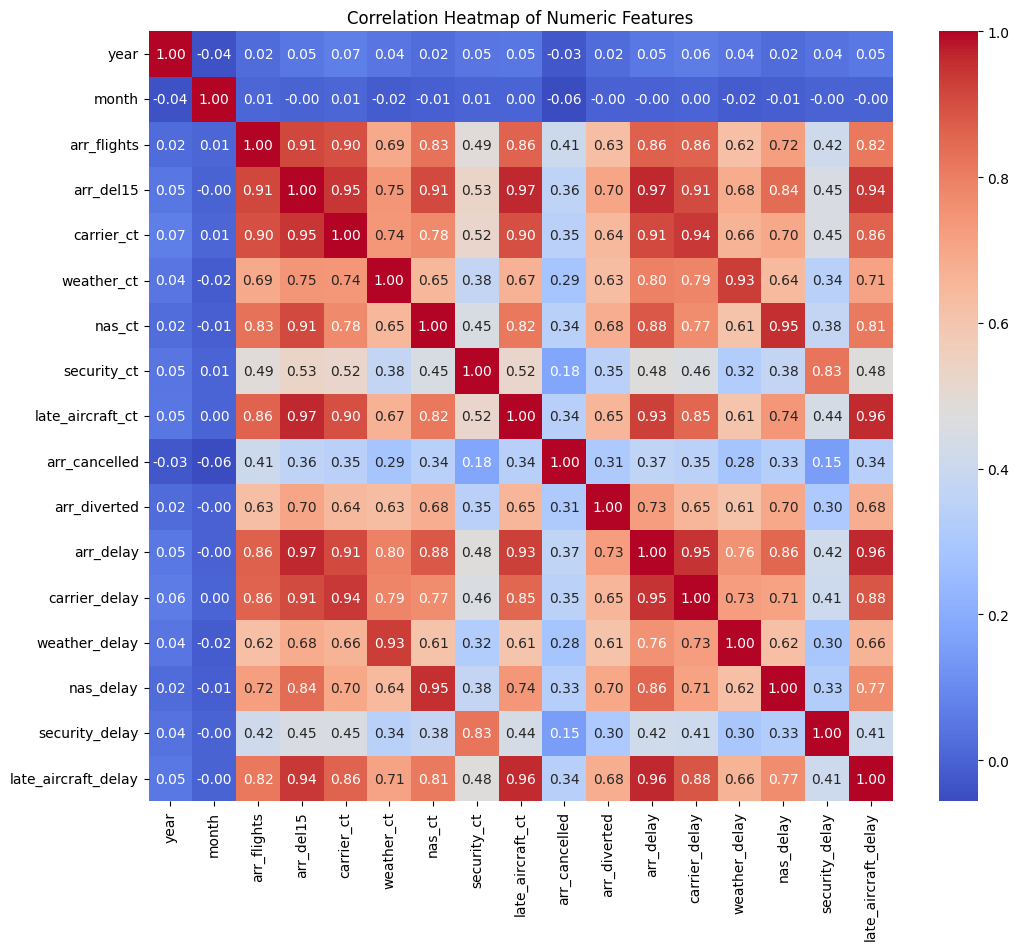

In [ ]:
# Select numeric columns (you can adjust as needed)
numeric_cols = df.select_dtypes(include=[float, int]).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Original Pearson correlation: 0.9094
Original Spearman correlation: 0.9084


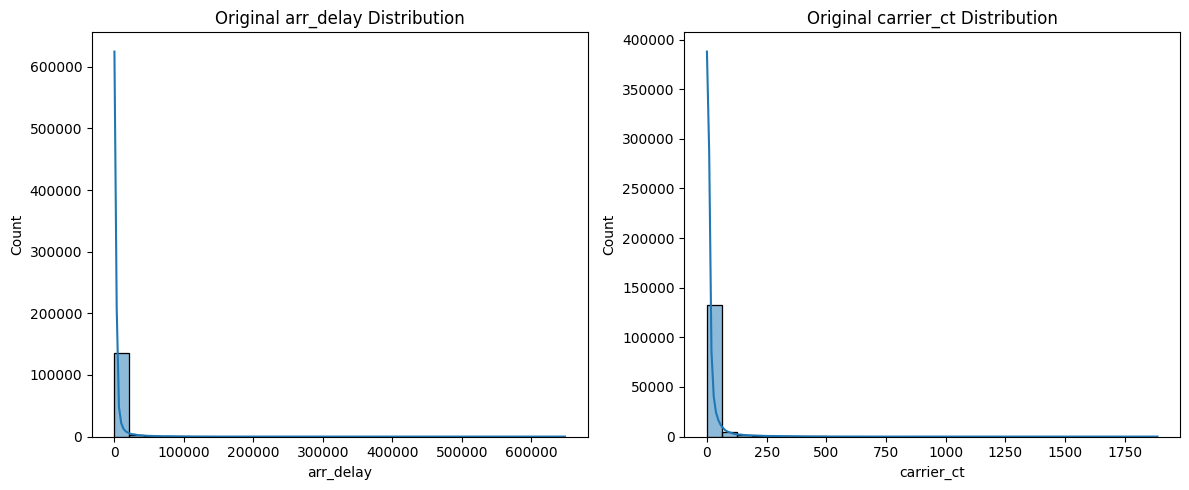

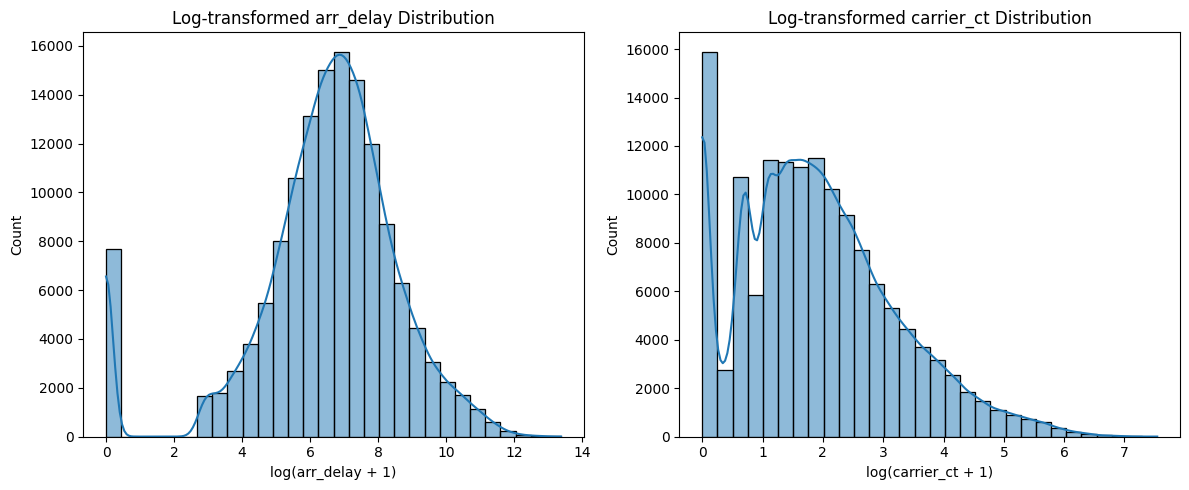

Log-transformed Pearson correlation: 0.8508
Log-transformed Spearman correlation: 0.9084


In [ ]:
# Assume df already contains the columns 'arr_delay' and 'carrier_ct'

# 1. Compute correlations on the original variables
pearson_corr = df['arr_delay'].corr(df['carrier_ct'], method='pearson')
spearman_corr = df['arr_delay'].corr(df['carrier_ct'], method='spearman')

print(f"Original Pearson correlation: {pearson_corr:.4f}")
print(f"Original Spearman correlation: {spearman_corr:.4f}")

# 2. Visualize the original distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['arr_delay'], kde=True, bins=30)
plt.title("Original arr_delay Distribution")
plt.xlabel("arr_delay")

plt.subplot(1,2,2)
sns.histplot(df['carrier_ct'], kde=True, bins=30)
plt.title("Original carrier_ct Distribution")
plt.xlabel("carrier_ct")
plt.tight_layout()
plt.show()

# 3. Apply a log transformation to reduce skewness
# Use log(x+1) to handle zeros properly.
df['log_arr_delay'] = np.log(df['arr_delay'] + 1)
df['log_carrier_ct'] = np.log(df['carrier_ct'] + 1)

# Visualize log-transformed distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['log_arr_delay'], kde=True, bins=30)
plt.title("Log-transformed arr_delay Distribution")
plt.xlabel("log(arr_delay + 1)")

plt.subplot(1,2,2)
sns.histplot(df['log_carrier_ct'], kde=True, bins=30)
plt.title("Log-transformed carrier_ct Distribution")
plt.xlabel("log(carrier_ct + 1)")
plt.tight_layout()
plt.show()

# 4. Compute correlations on the log-transformed variables
pearson_corr_log = df['log_arr_delay'].corr(df['log_carrier_ct'], method='pearson')
spearman_corr_log = df['log_arr_delay'].corr(df['log_carrier_ct'], method='spearman')

print(f"Log-transformed Pearson correlation: {pearson_corr_log:.4f}")
print(f"Log-transformed Spearman correlation: {spearman_corr_log:.4f}")


#Statistical Analysis

#Machine Learning

In [ ]:
dfm['date'] = pd.to_datetime(dfm['year'].astype(str) + '-' + dfm['month'].astype(str))
dfm = dfm[(dfm['date'] >= '2018-12-01') & (dfm['date'] <= '2024-12-31')]

# Check structure
print(dfm.head())
print(dfm.isnull().sum())

   year  month carrier carrier_name airport  \
0  2024     12      MQ    Envoy Air     EVV   
1  2024     12      MQ    Envoy Air     EWR   
2  2024     12      MQ    Envoy Air     EYW   
3  2024     12      MQ    Envoy Air     FAR   
4  2024     12      MQ    Envoy Air     FSD   

                               airport_name  arr_flights  arr_del15  \
0       Evansville, IN: Evansville Regional         61.0        9.0   
1  Newark, NJ: Newark Liberty International        107.0       42.0   
2      Key West, FL: Key West International        169.0       31.0   
3           Fargo, ND: Hector International        171.0       35.0   
4           Sioux Falls, SD: Joe Foss Field         69.0       14.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0        1.52        1.08  ...              5.84            0.0           0.0   
1        6.01        5.89  ...              4.94            0.0           0.0   
2        3.37        0.71  ...             15.4

<ipython-input-60-c7054968b83c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_afts['date'] = pd.to_datetime(dfm_afts[['year', 'month']].assign(day=1))
<ipython-input-60-c7054968b83c>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', hue='carrier', data=dfm_afts, ci=None, ax=ax)


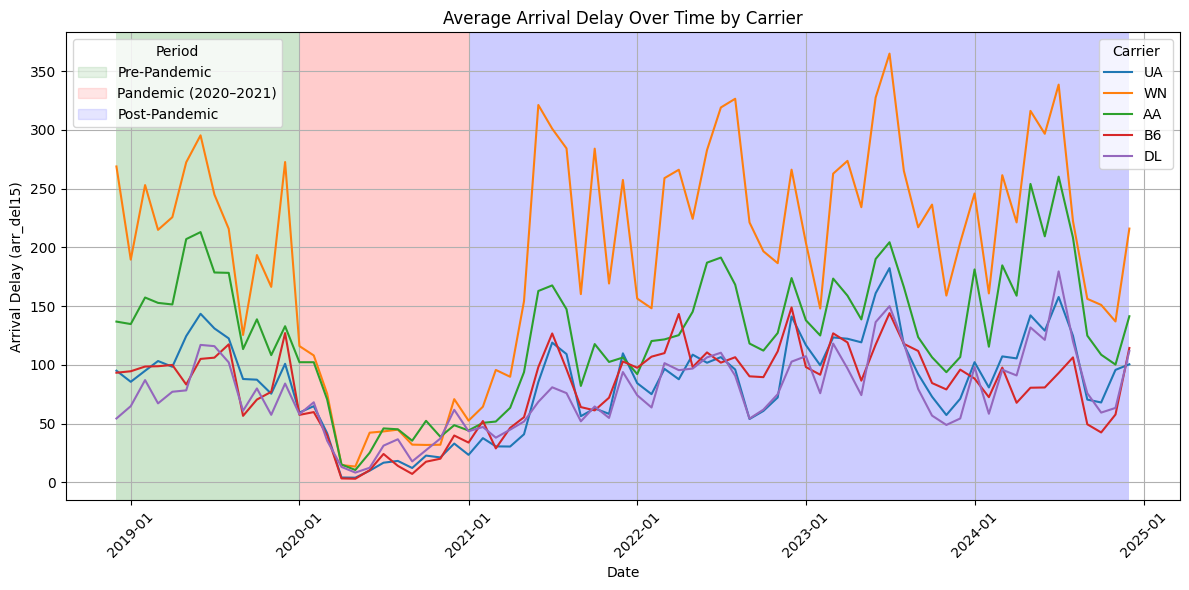

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# If a 'date' column does not exist, create it from 'year' and 'month'
if 'date' not in dfm_afts.columns:
    # Assume day 1 for each month
    dfm_afts['date'] = pd.to_datetime(dfm_afts[['year', 'month']].assign(day=1))
else:
    dfm_afts['date'] = pd.to_datetime(dfm_afts['date'])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line plot using seaborn. Each 'carrier' gets its own colored line.
sns.lineplot(x='date', y='arr_del15', hue='carrier', data=dfm_afts, ci=None, ax=ax)

# Define shading periods
pre_pandemic_end = pd.Timestamp('2020-01-01')
pandemic_end = pd.Timestamp('2021-01-01')  # End of 2021; post-pandemic begins 2022-01-01

# Shade the Pre-Pandemic period
ax.axvspan(dfm_afts['date'].min(), pre_pandemic_end, facecolor='green', alpha=0.2)
# Shade the Pandemic period
ax.axvspan(pre_pandemic_end, pandemic_end, facecolor='red', alpha=0.2)
# Shade the Post-Pandemic period
ax.axvspan(pandemic_end, dfm_afts['date'].max(), facecolor='blue', alpha=0.2)

# Format the x-axis date labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add titles and axis labels
plt.title('Average Arrival Delay Over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (arr_del15)')

# Create custom legend entries for the shaded time periods
period_patches = [
    Patch(color='green', alpha=0.1, label='Pre-Pandemic'),
    Patch(color='red', alpha=0.1, label='Pandemic (2020–2021)'),
    Patch(color='blue', alpha=0.1, label='Post-Pandemic')
]

# Extract the legend for the carrier lines
carrier_handles, carrier_labels = ax.get_legend_handles_labels()

# Place the carrier legend in the upper left.
carrier_leg = ax.legend(carrier_handles, carrier_labels, title='Carrier', loc='best')
# Add a separate legend for the periods in the upper right.
ax.legend(handles=period_patches, title='Period', loc='best')
# Add the carrier legend back
ax.add_artist(carrier_leg)

plt.tight_layout()
plt.grid()
plt.show()


<ipython-input-61-26b99e2c6bdc>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='carrier_ct', hue='carrier_name', data=dfm_afts, ci=None, ax=ax)


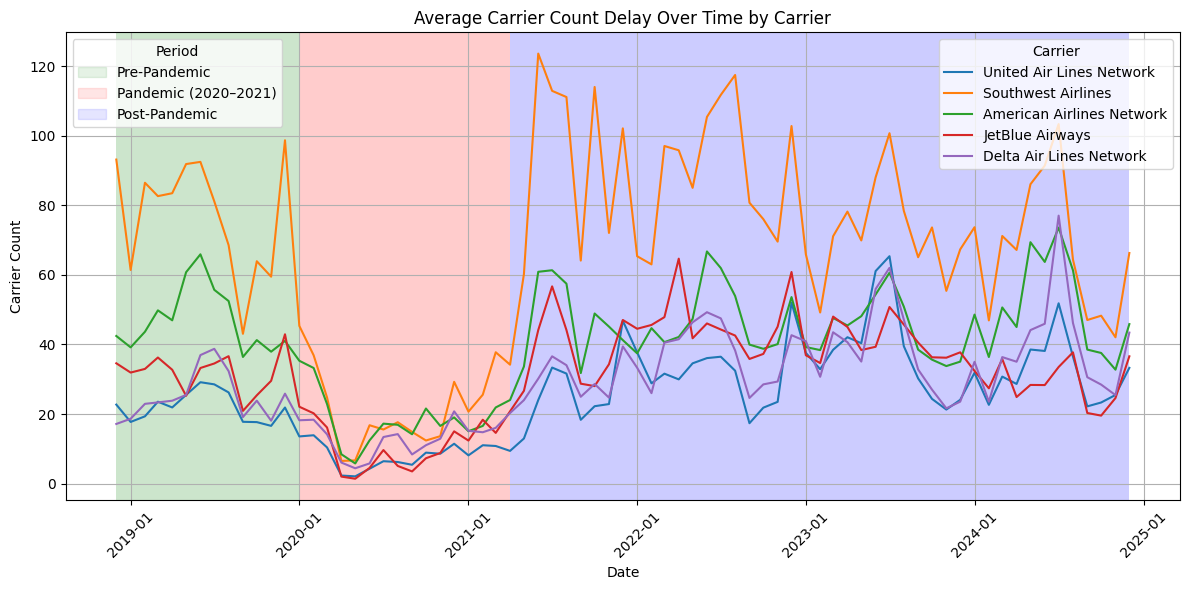

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# If a 'date' column does not exist, create it from 'year' and 'month'
if 'date' not in dfm_afts.columns:
    # Assume day 1 for each month
    dfm_afts['date'] = pd.to_datetime(dfm_afts[['year', 'month']].assign(day=1))
else:
    dfm_afts['date'] = pd.to_datetime(dfm_afts['date'])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line plot using seaborn. Each 'carrier' gets its own colored line.
sns.lineplot(x='date', y='carrier_ct', hue='carrier_name', data=dfm_afts, ci=None, ax=ax)

# Define shading periods
pre_pandemic_end = pd.Timestamp('2020-01-01')
pandemic_end = pd.Timestamp('2021-04-01')  # End of 2021; post-pandemic begins 2022-01-01

# Shade the Pre-Pandemic period
ax.axvspan(dfm_afts['date'].min(), pre_pandemic_end, facecolor='green', alpha=0.2)
# Shade the Pandemic period
ax.axvspan(pre_pandemic_end, pandemic_end, facecolor='red', alpha=0.2)
# Shade the Post-Pandemic period
ax.axvspan(pandemic_end, dfm_afts['date'].max(), facecolor='blue', alpha=0.2)

# Format the x-axis date labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add titles and axis labels
plt.title('Average Carrier Count Delay Over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Carrier Count')

# Create custom legend entries for the shaded time periods
period_patches = [
    Patch(color='green', alpha=0.1, label='Pre-Pandemic'),
    Patch(color='red', alpha=0.1, label='Pandemic (2020–2021)'),
    Patch(color='blue', alpha=0.1, label='Post-Pandemic')
]

# Extract the legend for the carrier lines
carrier_handles, carrier_labels = ax.get_legend_handles_labels()

# Place the carrier legend in the upper left.
carrier_leg = ax.legend(carrier_handles, carrier_labels, title='Carrier', loc='best')
# Add a separate legend for the periods in the upper right.
ax.legend(handles=period_patches, title='Period', loc='best')
# Add the carrier legend back
ax.add_artist(carrier_leg)

plt.tight_layout()
plt.grid()
plt.show()


<ipython-input-62-e2cd0e3808e2>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


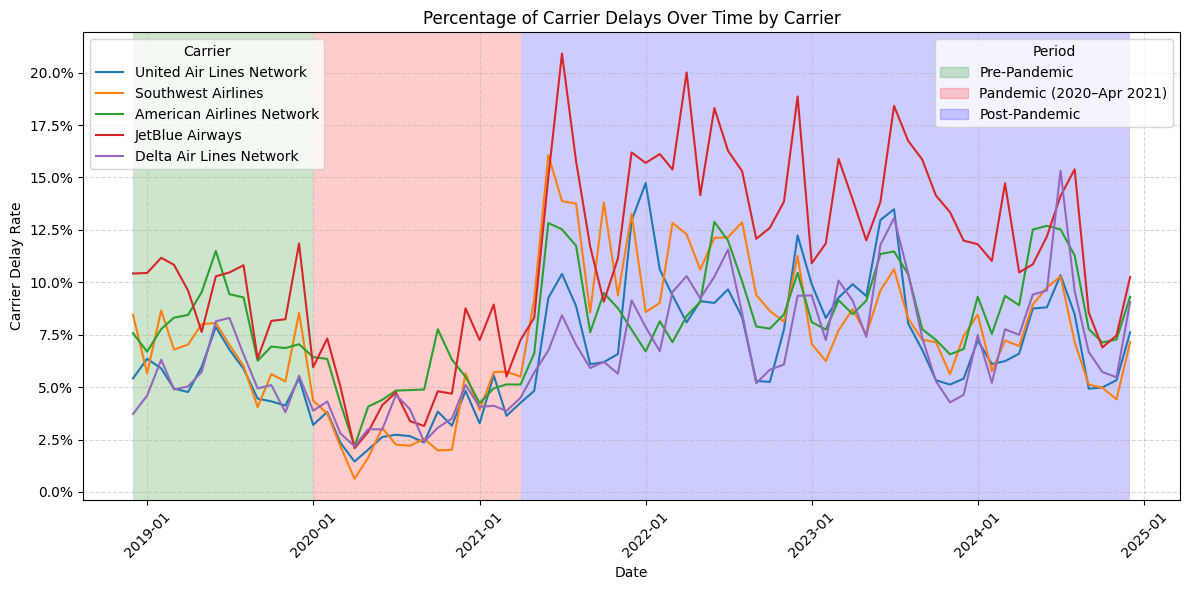

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter

# --- 1. Compute the delay percentage ---
# We assume your dfm_afts has a column 'arr_flights' for total flights per row.
# If it’s named differently, just swap in the correct column name.
dfm_afts['carrier_frac'] = dfm_afts['carrier_ct'] / dfm_afts['arr_flights']

# Create a percentage column (optional, for labels or tooltips)
dfm_afts['carrier_pct'] = dfm_afts['carrier_frac'] * 100

# --- 2. Ensure 'date' exists ---
if 'date' not in dfm_afts.columns:
    dfm_afts['date'] = pd.to_datetime(dfm_afts[['year', 'month']].assign(day=1))
else:
    dfm_afts['date'] = pd.to_datetime(dfm_afts['date'])

# --- 3. Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=dfm_afts,
    x='date',
    y='carrier_frac',      # plot the fraction
    hue='carrier_name',
    ci=None,
    ax=ax
)

# --- 4. Shade the pandemic periods ---
pre_pandemic_end = pd.Timestamp('2020-01-01')
pandemic_end    = pd.Timestamp('2021-04-01')  # adjust as desired

ax.axvspan(dfm_afts['date'].min(), pre_pandemic_end, facecolor='green', alpha=0.2)
ax.axvspan(pre_pandemic_end, pandemic_end,       facecolor='red',   alpha=0.2)
ax.axvspan(pandemic_end,    dfm_afts['date'].max(), facecolor='blue',  alpha=0.2)

# --- 5. Format the axes ---
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Turn y-axis into percentage
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))

# --- 6. Legends & Labels ---
plt.title('Percentage of Carrier Delays Over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Carrier Delay Rate')

# Carrier legend
carrier_handles, carrier_labels = ax.get_legend_handles_labels()
carrier_leg = ax.legend(carrier_handles, carrier_labels, title='Carrier', loc='upper left')

# Period shading legend
period_patches = [
    Patch(color='green', alpha=0.2, label='Pre-Pandemic'),
    Patch(color='red',   alpha=0.2, label='Pandemic (2020–Apr 2021)'),
    Patch(color='blue',  alpha=0.2, label='Post-Pandemic')
]
ax.legend(handles=period_patches, title='Period', loc='upper right')
ax.add_artist(carrier_leg)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-63-2a77efa1d725>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', hue='carrier', data=dfm_afts, ci=None, ax=ax)


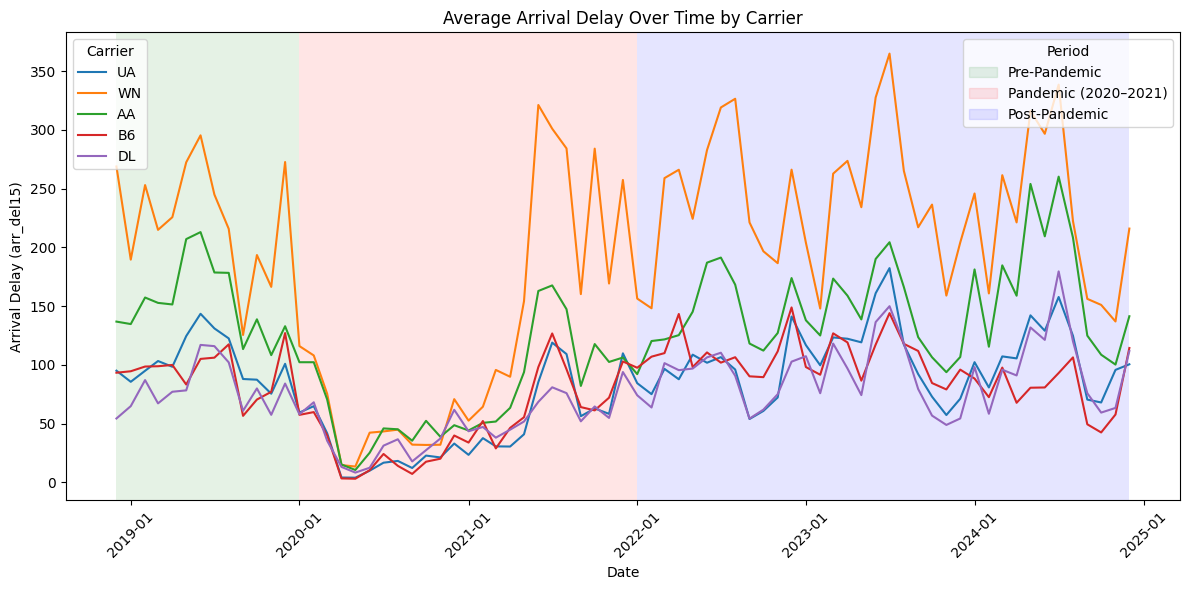

In [ ]:
# prompt: EDA: Plot arr_delay over time, by carrier, and by airport. I want it to be a smooth line plot AND THE DATA FRAME IS DFM filter it to just 2024

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# Ensure the 'date' column is in datetime format
dfm_afts['date'] = pd.to_datetime(dfm_afts['date'])

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the lineplot using seaborn with 'carrier' as the hue
sns.lineplot(x='date', y='arr_del15', hue='carrier', data=dfm_afts, ci=None, ax=ax)

# Define the periods for shading
pre_pandemic_end = pd.Timestamp('2020-01-01')
pandemic_end = pd.Timestamp('2022-01-01')  # End of 2021, so 2022 marks post-pandemic

# Add shading for the different time periods
ax.axvspan(dfm_afts['date'].min(), pre_pandemic_end, facecolor='green', alpha=0.1)
ax.axvspan(pre_pandemic_end, pandemic_end, facecolor='red', alpha=0.1)
ax.axvspan(pandemic_end, dfm_afts['date'].max(), facecolor='blue', alpha=0.1)

# Format the x-axis dates for better readability.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add titles and labels.
plt.title('Average Arrival Delay Over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (arr_del15)')

# Create a custom legend for the shading periods
period_patches = [Patch(color='green', alpha=0.1, label='Pre-Pandemic'),
                  Patch(color='red', alpha=0.1, label='Pandemic (2020–2021)'),
                  Patch(color='blue', alpha=0.1, label='Post-Pandemic')]

# Get the legend handles and labels for the carrier lines from seaborn
carrier_legend = ax.get_legend_handles_labels()

# Place the carrier legend on the upper left
carrier_legend_handles, carrier_legend_labels = carrier_legend
carrier_leg = ax.legend(carrier_legend_handles, carrier_legend_labels, title='Carrier', loc='upper left')

# Add the period legend on the upper right and add it as a separate artist.
ax.legend(handles=period_patches, title='Period', loc='upper right')
ax.add_artist(carrier_leg)

plt.tight_layout()
plt.show()


<ipython-input-64-e8aab07bd57f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', data=dfm_afts, ci=None)  # Add hue='carrier' for legend
<ipython-input-64-e8aab07bd57f>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Carrier')  # Add legend with title


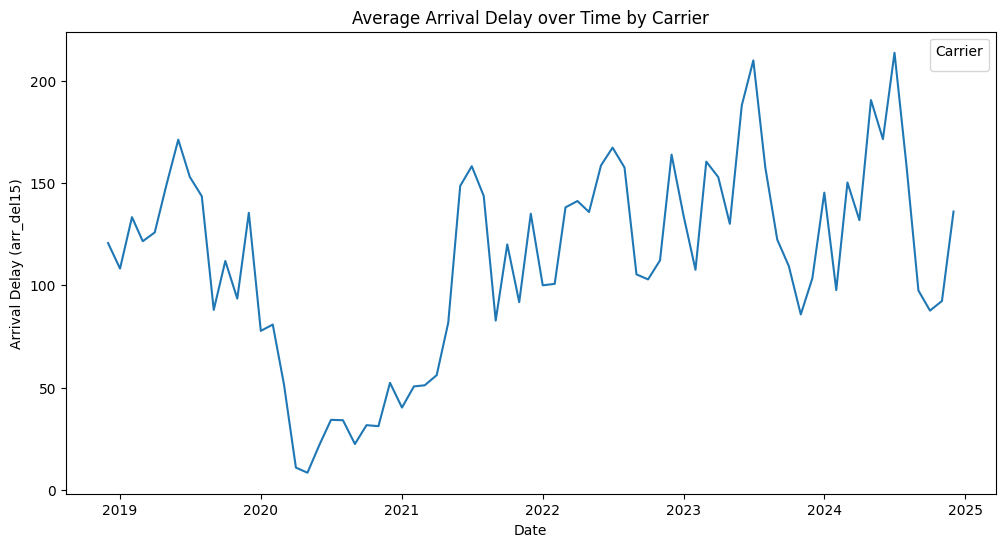

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='arr_del15', data=dfm_afts, ci=None)  # Add hue='carrier' for legend
plt.title('Average Arrival Delay over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (arr_del15)')
plt.legend(title='Carrier')  # Add legend with title
plt.show()

<ipython-input-65-4b44348150cf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='weather_ct', hue='carrier', data=dfm_afts, ci=None)  # Add hue='carrier' for legend


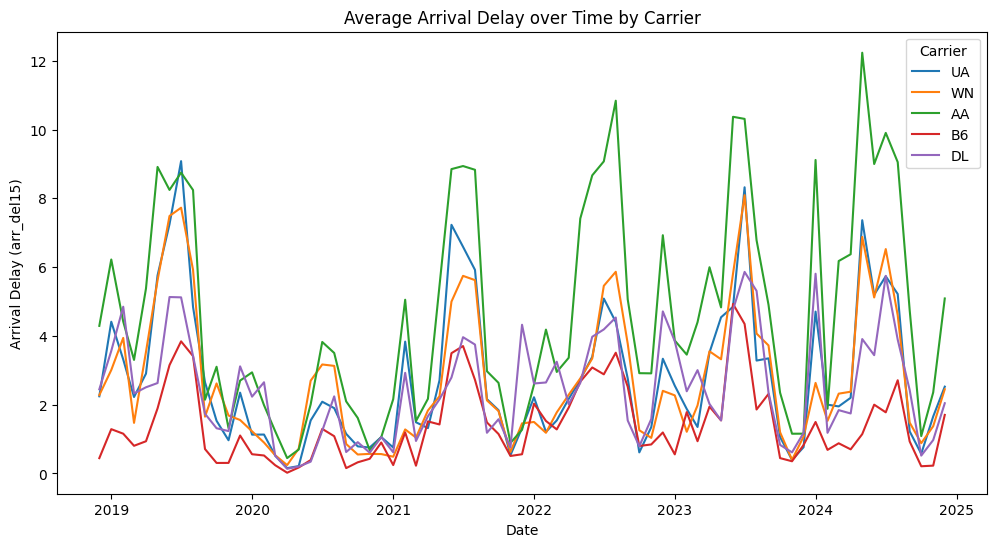

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='weather_ct', hue='carrier', data=dfm_afts, ci=None)  # Add hue='carrier' for legend
plt.title('Average Arrival Delay over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (arr_del15)')
plt.legend(title='Carrier')  # Add legend with title
plt.show()

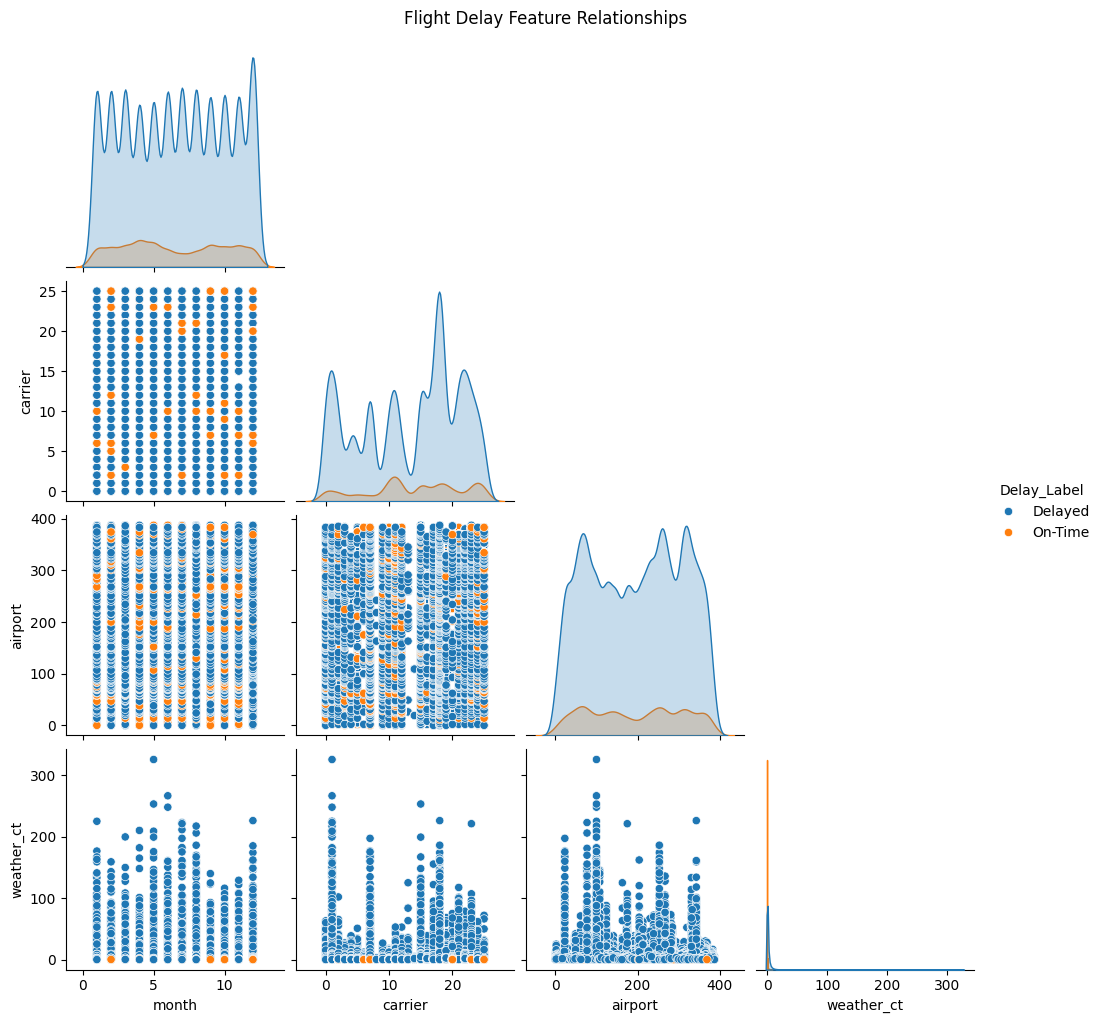


 Not the best Accuracy: 87.8%
 Better Accuracy: 87.8%

 Feature Importance:
weather_ct    0.801893
carrier       0.139148
month         0.035352
airport       0.023608
dtype: float64

 Cross-validation accuracy scores for each fold:
 [0.87755175 0.87758296 0.87758296 0.877334   0.87758296]

 Mean accuracy: 87.75%
 Standard deviation: 0.01%


In [ ]:
# Drop rows with missing data
df = pd.read_csv('/content/Airline_Delay_Causes.csv')

df = df.dropna(subset=['carrier_delay', 'month', 'carrier', 'airport', 'weather_ct'])

# Create target
df['Carrier_Delay_Flag'] = df['carrier_delay'].apply(lambda x: 1 if x > 15 else 0)
df['Delay_Label'] = df['Carrier_Delay_Flag'].map({0: 'On-Time', 1: 'Delayed'})

# Encode categorical variables
for col in ['carrier', 'airport']:
    df[col] = df[col].astype('category').cat.codes


# Use selected features
features = ['month', 'carrier', 'airport', 'weather_ct']
X = df[features]
y = df['Carrier_Delay_Flag']

# Pairplot visualization
sns.pairplot(df[features + ['Delay_Label']], hue='Delay_Label', diag_kind='kde', corner=True)
plt.suptitle('Flight Delay Feature Relationships', y=1.02)
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# BAD MODEL
model_bad = RandomForestClassifier(n_estimators=2, max_depth=1, random_state=1)
model_bad.fit(X_train, y_train)
y_pred_bad = model_bad.predict(X_test)
print(f"\n Not the best Accuracy: {accuracy_score(y_test, y_pred_bad) * 100:.1f}%")

# BETTER MODEL
model_better = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_split =  5, random_state=1)
model_better.fit(X_train, y_train)
y_pred_better = model_better.predict(X_test)
print(f" Better Accuracy: {accuracy_score(y_test, y_pred_better) * 100:.1f}%")

# Feature importance
feature_importance = pd.Series(model_better.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("\n Feature Importance:")
print(feature_importance)

# Cross-validation
scores = cross_val_score(model_better, X, y, cv=5)
print("\n Cross-validation accuracy scores for each fold:\n", scores)
print(f"\n Mean accuracy: {np.mean(scores) * 100:.2f}%")
print(f" Standard deviation: {np.std(scores) * 100:.2f}%")

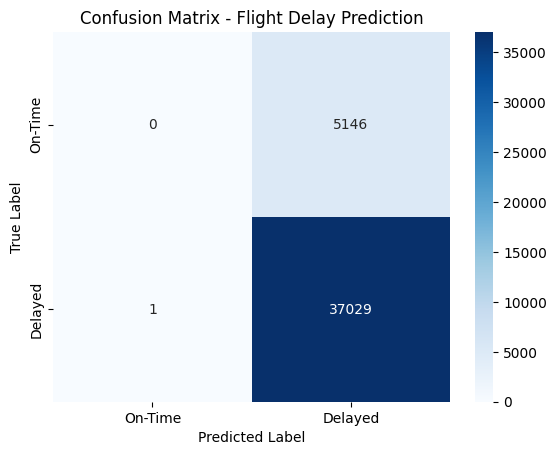

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_better)
labels = ['On-Time', 'Delayed']

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Flight Delay Prediction')
plt.show()

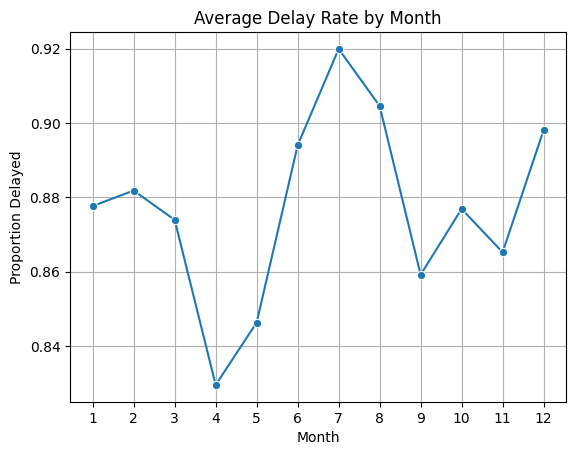

In [ ]:
monthly_delay = df.groupby('month')['Carrier_Delay_Flag'].mean().reset_index()
sns.lineplot(data=monthly_delay, x='month', y='Carrier_Delay_Flag', marker='o')
plt.title('Average Delay Rate by Month')
plt.ylabel('Proportion Delayed')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

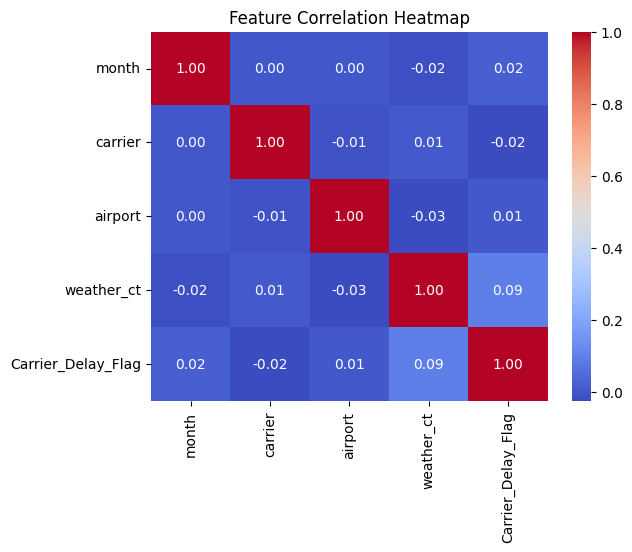

In [ ]:
corr = df[features + ['Carrier_Delay_Flag']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 91.35%
Confusion Matrix:
[[ 9485   684]
 [ 1271 11153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     10169
           1       0.94      0.90      0.92     12424

    accuracy                           0.91     22593
   macro avg       0.91      0.92      0.91     22593
weighted avg       0.92      0.91      0.91     22593



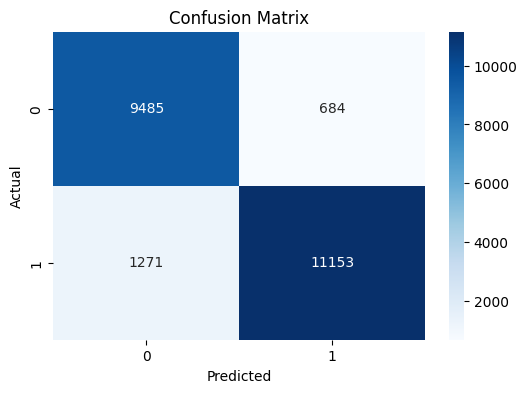

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Load Dataset ------------------
df = pd.read_csv('/content/Airline_Delay_Causes.csv')

# ------------------ Feature Engineering ------------------
# Create time-based features
df['quarter'] = (df['month'] - 1) // 3 + 1
df['is_holiday_month'] = df['month'].isin([11, 12]).astype(int)

# Define a list of numeric features (adjust this list if needed)
selected_features = [
    'month', 'quarter', 'is_holiday_month',
    'arr_flights', 'arr_cancelled', 'arr_diverted',
    'weather_ct', 'weather_delay',
    'nas_ct', 'nas_delay',
    'security_ct', 'security_delay',
    'late_aircraft_ct', 'late_aircraft_delay',
    'arr_delay'
]

# Drop rows with missing values in essential columns
df = df.dropna(subset=['carrier_ct', 'airport', 'carrier', 'year', 'month'] + selected_features)

# ------------------ Creating the Binary Target ------------------
# Define 'Delay_Flag' as 1 if carrier_ct > threshold, else 0
threshold = 5  # Adjust this threshold as needed
df['Delay_Flag'] = (df['carrier_ct'] > threshold).astype(int)

# ------------------ Encoding Categorical Features ------------------
# One-hot encode 'airport'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
airport_encoded = encoder.fit_transform(df[['airport']])
airport_df = pd.DataFrame(airport_encoded, columns=encoder.get_feature_names_out(['airport']))

# One-hot encode 'carrier'
carrier_encoded = pd.get_dummies(df['carrier'], prefix='carrier')

# ------------------ Creating the Final Feature Matrix ------------------
# Use numeric features, and include 'year' for splitting later
X_numeric = df[selected_features].reset_index(drop=True)
X_year = df[['year']].reset_index(drop=True)
# Concatenate all features: year, numeric, and encoded variables
X = pd.concat([X_year, X_numeric,
               airport_df.reset_index(drop=True),
               carrier_encoded.reset_index(drop=True)], axis=1)
y = df['Delay_Flag'].reset_index(drop=True)

# ------------------ Splitting Data: Train until 2023, Test on 2024 ------------------
# Create boolean masks based on the 'year' column of X_year
train_mask = X_year['year'] < 2024
test_mask  = X_year['year'] == 2024

# Apply masks and drop the 'year' column from X
X_train = X.loc[train_mask].drop(columns=['year']).reset_index(drop=True)
X_test  = X.loc[test_mask].drop(columns=['year']).reset_index(drop=True)
y_train = y.loc[train_mask].reset_index(drop=True)
y_test  = y.loc[test_mask].reset_index(drop=True)

# ------------------ Model Training: Logistic Regression ------------------
model = LogisticRegression(max_iter=300, random_state=42)
model.fit(X_train, y_train)

# ------------------ Predict and Evaluate ------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ------------------ Visualization: Confusion Matrix ------------------
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


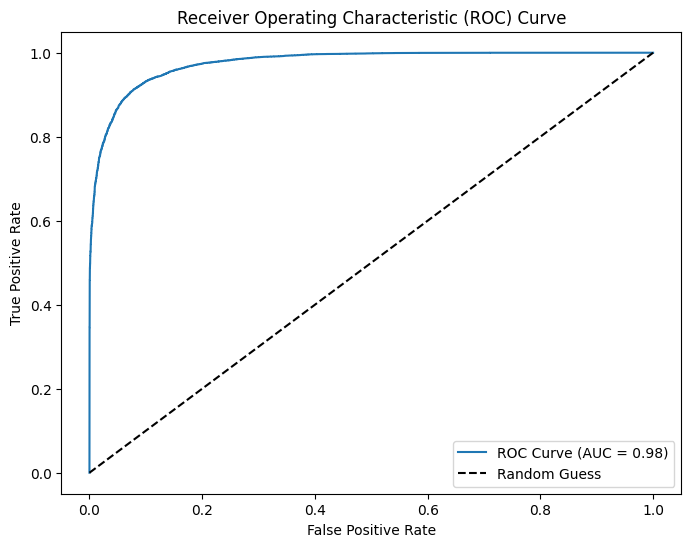

In [ ]:
# ------------------ Visualization 2: ROC Curve ------------------
# Calculate predicted probabilities for the positive class (Delay_Flag == 1)
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

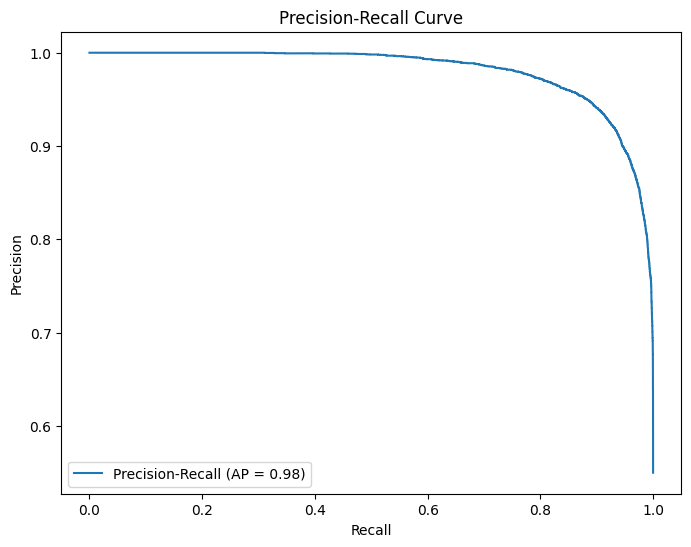

In [ ]:
# ------------------ Visualization 3: Precision-Recall Curve ------------------
precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

<ipython-input-35-055a1f183928>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df_sorted, x='coefficient', y='feature', palette='viridis')


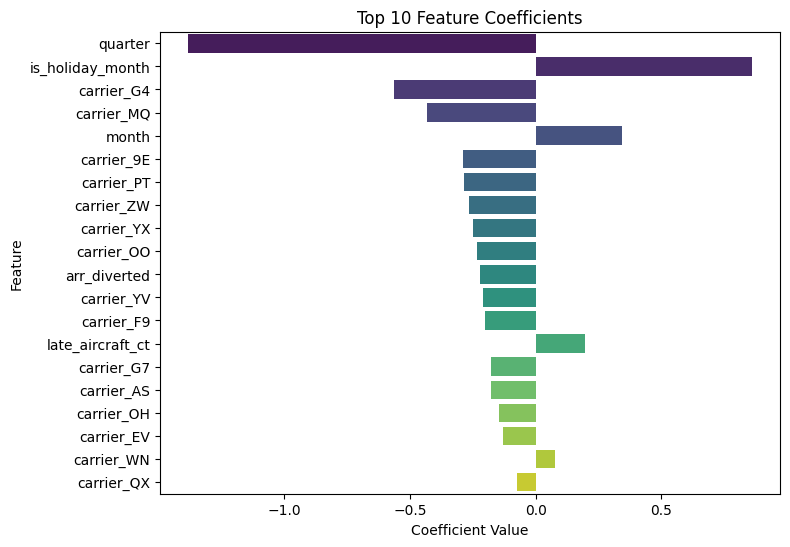

In [ ]:
# 1. Feature Coefficient Plot (Top 10 by absolute value)
# Logistic Regression coefficients can provide insight into feature impact.
importances = model.coef_[0]  # Coefficients from logistic regression
features = X_train.columns
coef_df = pd.DataFrame({'feature': features, 'coefficient': importances})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(data=coef_df_sorted, x='coefficient', y='feature', palette='viridis')
plt.title('Top 10 Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

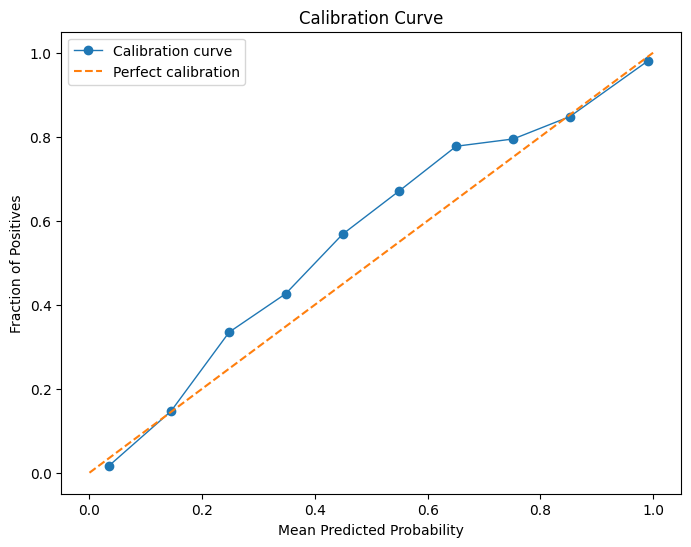

In [ ]:
# 2. Calibration Curve
from sklearn.calibration import calibration_curve

# Use the previously computed predicted probabilities (y_probs) for the positive class (Delay_Flag==1)
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

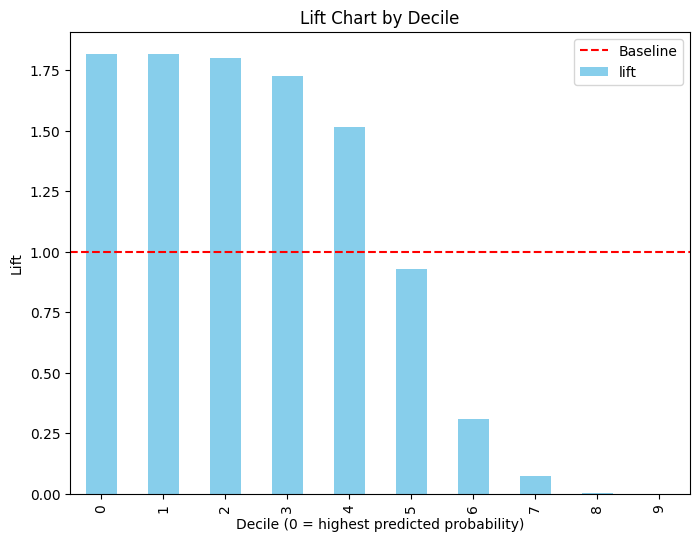

In [ ]:
# 2. Lift (Decile) Chart
# Sort test examples by predicted probability and create deciles
test_data = pd.DataFrame({'y_actual': y_test, 'y_prob': y_probs})
test_data = test_data.sort_values(by='y_prob', ascending=False).reset_index(drop=True)
test_data['decile'] = pd.qcut(test_data.index, 10, labels=False)

lift_df = test_data.groupby('decile').agg({
    'y_actual': ['mean', 'count']
})
lift_df.columns = ['avg_actual_delay_rate', 'count']
overall_delay_rate = y_test.mean()
lift_df['lift'] = lift_df['avg_actual_delay_rate'] / overall_delay_rate

plt.figure(figsize=(8, 6))
lift_df['lift'].plot(kind='bar', color='skyblue')
plt.axhline(1, color='red', linestyle='--', label='Baseline')
plt.xlabel('Decile (0 = highest predicted probability)')
plt.ylabel('Lift')
plt.title('Lift Chart by Decile')
plt.legend()
plt.show()

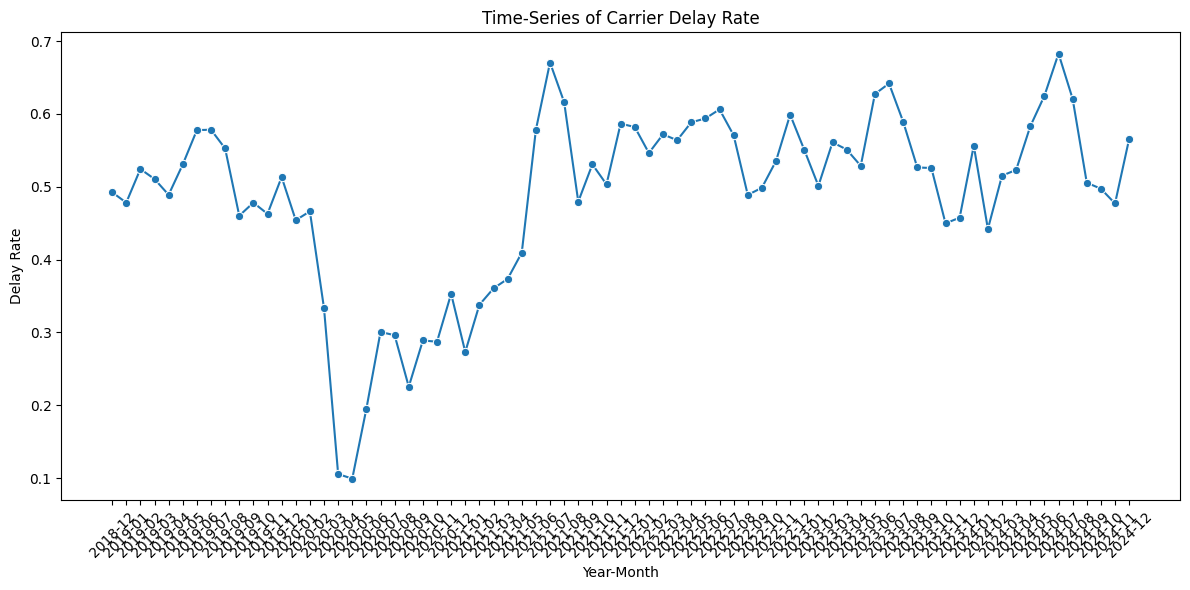

In [ ]:

# 3. Time-Series Plot of Delay Rate over Time
# Aggregate the original dataframe by year and month to see actual delay rates.
# (Assuming the original df still has a valid 'year', 'month', and 'Delay_Flag')
time_df = df.groupby(['year', 'month']).agg({'Delay_Flag': 'mean'}).reset_index()
time_df['Year-Month'] = time_df['year'].astype(str) + '-' + time_df['month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df, x='Year-Month', y='Delay_Flag', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Delay Rate')
plt.title('Time-Series of Carrier Delay Rate')
plt.tight_layout()
plt.show()